In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def Reach_eulerexplicite(t_0, t_f: float, D: list, f, u , x_0, n =None, h=None):
    """Implementing euler method on a pertubation scheme. Work well when the pertubation set is finite"""
    assert n is not None or h is not None, "precise a step or a number of steps"
    if n is not None: 
        h = (t_f - t_0)/n
    else: 
        n = int((t_f - t_0)/n)+1
    Timestep = [t_0 + i*h for i in range(n+1)]
    Timestep[n] = t_f
    Reach = [[x_0]]
    for i in range(n): 
        h = Timestep[i+1] - Timestep[i]
        new = [x+ h*f(x,u(Timestep[i]), d) for x in Reach[i] for d in D] 
        
        Reach.append(new)
    return Reach, Timestep

In [17]:
def eulerexplicite(t_0, t_f: float, f, u, d , x_0, n =None, h=None, proj = lambda x: x):
    """Implementing euler method on a pertubation scheme. Work well when the pertubation set is finite"""
    assert n is not None or h is not None, "precise a step or a number of steps"
    if n is not None: 
        h = (t_f - t_0)/n
    else: 
        n = int((t_f - t_0)/n)+1
    Timestep = [t_0 + i*h for i in range(n+1)]
    Timestep[n] = t_f
    Reach = [x_0]
    for i in range(n): 
        h = Timestep[i+1] - Timestep[i]
        new = Reach[-1]+ h*f(Reach[-1],u(Timestep[i]), d(Timestep[i]))
        Reach.append(proj(new))
    return Reach, Timestep

y1 = y0 + (⅙) (k1 + 2k2 + 2k3 + k4)

Here,

k1 = hf(x0, y0)

k2 = hf[x0 + (½)h, y0 + (½)k1]

k3 = hf[x0 + (½)h, y0 + (½)k2]

k4 = hf(x0 + h, y0 + k3)

In [18]:
def RK4(t_0, t_f: float, f, u, d , x_0, n =None, h=None, proj = lambda x: x):
    """Implementing euler method on a pertubation scheme. Work well when the pertubation set is finite"""
    assert n is not None or h is not None, "precise a step or a number of steps"
    if n is not None: 
        h = (t_f - t_0)/n
    else: 
        n = int((t_f - t_0)/n)+1
    Timestep = [t_0 + i*h for i in range(n+1)]
    Timestep[n] = t_f
    Reach = [x_0]
    for i in range(n): 
        h = Timestep[i+1] - Timestep[i]
        k1 = h*f(Reach[-1],u(Timestep[i]), d(Timestep[i]))
        s = Reach[-1]+ k1/2
        t_1 = Timestep[i] + h/2
        k2 = h*f(proj(s) ,u(t_1), d(t_1))
        s = Reach[-1]+ k2/2
        k3 = h*f(proj(s) ,u(t_1), d(t_1))
        s = Reach[-1]+ k3
        k4 = h*f(proj(s) ,u(Timestep[i+1]), d(Timestep[i+1]))
        new = Reach[-1]+ (k1 + 2*(k2+k3)+ k4)/6
        Reach.append(proj(new))
    return Reach, Timestep

In [19]:
def sampling_increasing_sequence(N): 
    L= [0]
    for i in range(N-1): 
        L.append(L[-1]+np.random.lognormal())
    return L
def sampling_function(N, D): 
    """The goal is to randomly generates a function from T to the sets.
    We will be doing affine approximation of this function"""
    T = sampling_increasing_sequence(N)
    S = D[np.random.choice(len(D), size =N)]
    return T,S
def piecewise_affine(t,T,S):
    a = 0 
    b = len(T)-1
    if  (t >= T[-1]): 
        return S[-1]
    while (b-a)>1 :
        m = int((a+b)//2)
        if t >= T[m]:
            a = m
        else: 
            b=m
    h = S[a] + (S[b] - S[a])*(t-T[a])/(T[b] - T[a])
    return h
def sampling_stepfunction(N, D): 
    """The goal is to randomly generates a function from T to the sets.
    We will be doing affine approximation of this function"""
    S = D[np.random.choice(len(D), size =N)]
    return S
def step_function(t,h,S): 
    m = len(S)
    n = int(t/h)
    if n >= m: 
        return S[-1]
    return S[n]
def piecewise_step_function(t,h,S): 
    m = len(S)
    n = int(t/h)
    if n >= 0 and n < m: 
        s=(t-n*h)*(S[n + 1] - S[n])/h + S[n] 
    elif n >= m: 
        s = s[m]
    return s

In [20]:
def pos_util(x, a, b):
    s = 1
    n = len(x)
    T =np.zeros((n,2)) 
    for i,(xi, ai, bi) in enumerate(zip(x,a,b)): 
        T[i,0], T[i,1]= 0,1
        if ai-bi> 0: 
            h = (xi-bi)/(ai-bi)
            T[i,0] = h
            T[i,1] = 1
        elif ai-bi<0:
            h = (xi-bi)/(ai-bi)
            T[i,0] = 0
            T[i,1] = h
        else: 
            if xi <= ai:
                T[i,0] = 0
                T[i,1] = 1
            else:
                return False
    return np.max(T[:,0])<=np.min(T[:,1])
def pos_util_up(x, a, b):
    s = 1
    n = len(x)
    T =np.zeros((n,2)) 
    for i,(xi, ai, bi) in enumerate(zip(x,a,b)): 
        T[i,0], T[i,1]= 0,1
        if ai-bi > 0: 
            h = (xi-bi)/(ai-bi)
            T[i,0] = 0
            T[i,1] = h
        elif ai-bi<0:
            h = (xi-bi)/(ai-bi)
            T[i,0] = h
            T[i,1] = 1
        else: 
            if xi >= ai:
                T[i,0] = 0
                T[i,1] = 1
            else:
                return False
    return np.max(T[:,0])<=np.min(T[:,1])

In [21]:
def pos_traj(x, Traj):
    """Use the pos_util but on an array of consecutive segments """
    n = len(Traj)
    for i, a in enumerate(Traj): 
        if i < n-1: 
            if pos_util(x, a, Traj[i+1]): 
                return True
    return False
def pos_traj_up(x, Traj):
    """Use the pos_util but on an array of consecutive segments """
    n = len(Traj)
    for i, a in enumerate(Traj): 
        if i < n-1: 
            if pos_util_up(x, a, Traj[i+1]): 
                return True
    return False

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

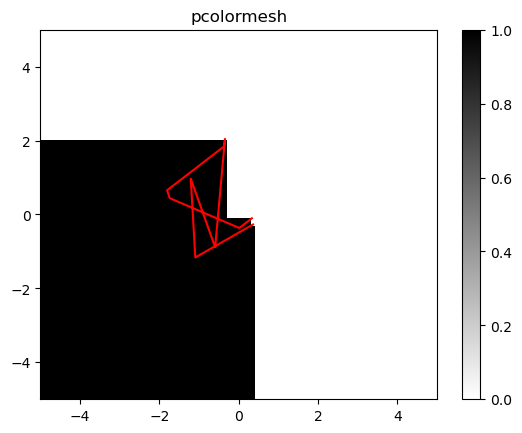

In [22]:
traj= np.random.normal(size=(10, 2))
x = np.linspace(-5,5, 100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
Z = X.copy()
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i,j]=int(pos_traj([X[i,j], Y[i,j]], traj))
fig, ax = plt.subplots()

c = ax.pcolormesh(X, Y, Z, cmap='gray_r')
plt.plot(traj[:,0], traj[:,1], '-r')
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [23]:
def is_feasible_euler_case1(x_0,u, d, T, N_euler, f, g, proj = lambda x: x):
    Solu,Timestep = eulerexplicite(t_0 = 0, t_f=T, f=f, u=u, d=d , x_0 = x_0, n =N_euler, proj = proj)
    k = [g(i) == 0 for i in Solu]
    if any(k):
        return False
    for i in range(2, N_euler):
        if pos_traj(Solu[i], Solu[:i]): 
            return True 
    return False
def is_feasible_rk4_case1(x_0,u, d, T, N_euler, f, g, proj = lambda x: x):
    Solu,Timestep = RK4(t_0 = 0, t_f=T, f=f, u=u, d=d , x_0 = x_0, n =N_euler,proj = proj)
    k = [g(i) == 0 for i in Solu]
    if any(k):
        return False
    for i in range(2, N_euler):
        if pos_traj(Solu[i], Solu[:i]): 
            return True
    return False

In [24]:
def is_feasible_rk4_case2(x_0,u, d, T, N_euler, f, g, t_0 = 0,proj = lambda x: x):
    #Solu,Timestep = RK4(t_0 = 0, t_f=T, f=f, u=u, d=d , x_0 = x_0, n =N_euler,proj = proj)
    h = (T- t_0)/N_euler
    Timestep = [t_0 + i*h for i in range(N_euler+1)]
    Timestep[N_euler] = T
    Reach = [x_0]
    for i in range(N_euler): 
        h = Timestep[i+1] - Timestep[i]
        k1 = h*f(Reach[-1],u(Timestep[i]), d(Timestep[i]))
        s = Reach[-1]+ k1/2
        t_1 = Timestep[i] + h/2
        k2 = h*f(proj(s) ,u(t_1), d(t_1))
        s = Reach[-1]+ k2/2
        k3 = h*f(proj(s) ,u(t_1), d(t_1))
        s = Reach[-1]+ k3
        k4 = h*f(proj(s) ,u(Timestep[i+1]), d(Timestep[i+1]))
        new = Reach[-1]+ (k1 + 2*(k2+k3)+ k4)/6
        if g(proj(new)) == 0:
            Reach.append(proj(new))
            return Reach , Timestep[:i+1], 0 
        if pos_traj(new, Reach): 
            Reach.append(proj(new))
            return Reach , Timestep[:i+1], 1
        Reach.append(proj(new))
    return Reach, Timestep, 2

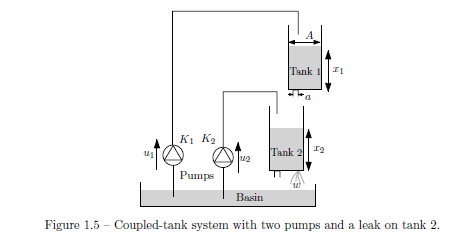
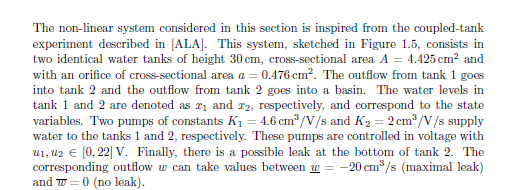
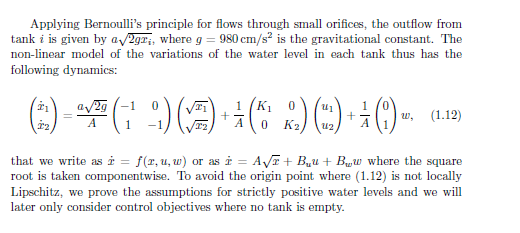

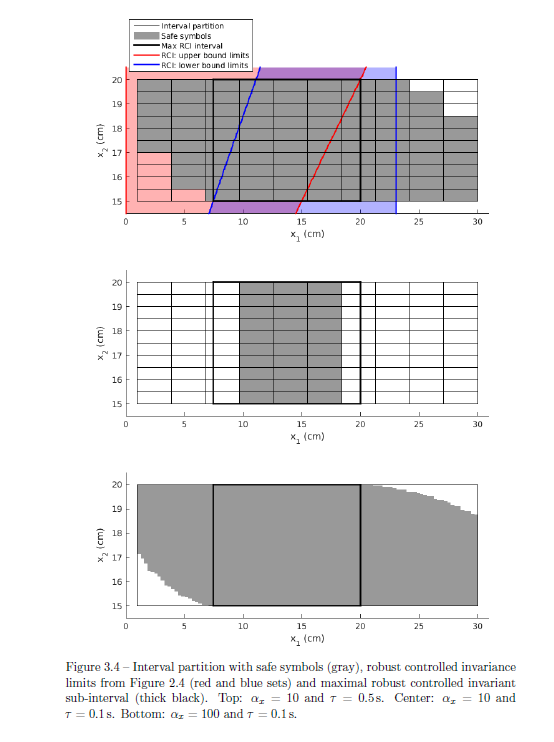

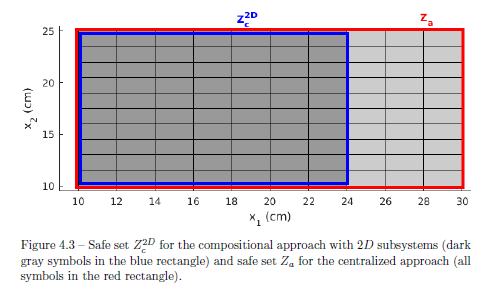

In [25]:
A = 4.425
H = 30
a = 0.476
K1 = 4.6
K2 = 2
u_min = 0
u_max = 22
w_min = -20
w_max = 0
g = 980
X_matrix = - np.eye(2)*(a*np.sqrt(2*g))/A
X_matrix[1, 0] = (a*np.sqrt(2*g))/A
U_matrix = np.array([[K1, 0],[0, K2]])/A
w_matrix = np.array([0,1])/A

def f(x, u,w): 
    k = np.sqrt(x)
    h = np.matmul(X_matrix, k) + np.matmul(U_matrix, u) + w_matrix.T*w
    return h
def g(x): 
    return ((x[0]<= 30 and x[1] <= 20)) and (x[0]>=0 and x[1]>=0)
proj = lambda x : np.where(x < 0, 0 , x) 
T = 50
h = 5.0
x_0 = np.array([30, 20])
N_step = 10
N_euler = 1000

u = lambda t: step_function(t,h,[np.array([u_min, u_min])])
w = lambda t: step_function(t,h,[w_max])
print(is_feasible_rk4_case2(x_0,u, w, T, N_euler*N_step, f, g, proj = proj))
# print(is_feasible_euler_case1(x_0,u, d, T, N_euler*N_step, f, g, proj))
# Solu1,Timestep= RK4(t_0 = 0, t_f=T, f=f, u=u, d=w , x_0 = x_0, n =N_euler*N_step, proj = proj)
# plt.plot(np.array(Solu1)[:,0], np.array(Solu1)[:,1],'-', label = "rk4" )
# Solu2,Timestep= eulerexplicite(t_0 = 0, t_f=T, f=f, u=u, d=w , x_0 = x_0, n =N_euler*N_step, proj = proj)

# plt.plot(np.array(Solu2)[:,0], np.array(Solu2)[:,1],'-', label= "euler" )
# plt.legend()

([array([30, 20]), array([29.8697193 , 20.02375952])], [0.0], 0)


In [26]:
def computing_grid(g, x_min, x_max, N, M):
    x = np.linspace(x_min[0],x_max[0], N)
    y = np.linspace(x_min[1],x_max[1], M)
    X,Y = np.meshgrid(x,y)
    Z = X.copy() 
    for i in range(len(X)):
        for j in range(len(X[0])):
            Z[i,j] = g(np.array([X[i,j], Y[i,j]]))
    return X, Y,Z


def computing_invariant(g, f, u_min, u_max, d_min, d_max, epsilon , x_min, x_max ,T, N_euler, proj): 
    N,M = list(((x_max - x_min)/(epsilon)).astype(int)+1) 
    X, Y,Z = computing_grid(g, x_min, x_max, N, M)
    Traj = []
    for i in range(len(X)-1, -1,-1):
        for j in range(len(X[0])-1, -1,-1): 
            s= 0
            if Z[i,j] == 1: 
                if Traj: 
                    for traj in Traj: 
                        h = pos_traj([X[i,j], Y[i,j]], traj)
                        if pos_traj([X[i,j], Y[i,j]], traj):
                            s = 1
                    if s==1:
                        continue
                u = lambda t: u_min
                d = lambda t: d_max
                h = is_feasible_rk4_case1(np.array([X[i,j], Y[i,j]]),u, d, T, N_euler, f, g, proj)
                
                if h:
                    Solu1,_= RK4(t_0 = 0, t_f=T, f=f, u=u, d=w , x_0 = np.array([X[i,j], Y[i,j]]), n =N_euler, proj = proj)
                    Traj.append(Solu1.copy())
                    del(Solu1)
    return Traj
def computing_invariant2(g, f, u_min, u_max, d_min, d_max, epsilon , x_min, x_max ,T, N_euler, proj): 
    N,M = list(((x_max - x_min)/(epsilon)).astype(int)+1) 
    X, Y,Z = computing_grid(g, x_min, x_max, N, M)
    Traj_feas = []
    Traj_unsafe = []
    Traj_safe = [] 
    for i in range(len(X)-1, -1,-1):
        for j in range(len(X[0])-1, -1,-1): 
            s= 0
            if Z[i,j] == 1: 
                if Traj_feas: 
                    for traj in Traj_feas: 
                        if pos_traj([X[i,j], Y[i,j]], traj[0]):
                            s = 1
                            break 
                    if s==1:
                        continue
                if Traj_unsafe: 
                    for traj in Traj_unsafe: 
                        if pos_traj_up([X[i,j], Y[i,j]], traj[0]):
                            s = 2
                            break 
                    if s==2:
                        continue
                u = lambda t: u_min
                d = lambda t: d_max
                
                Reach, Timestep, h = is_feasible_rk4_case2(np.array([X[i,j], Y[i,j]]),u, d, T, N_euler, f, g, proj = proj)
                
                if h == 0:
                    Traj_unsafe.append([Reach.copy(), Timestep.copy()])
                    del(Reach)
                    del(Timestep)
                elif h == 1: 
                    Traj_feas.append([Reach.copy(), Timestep.copy()])
                    del(Reach)
                    del(Timestep)
                elif h ==3: 
                    Traj_safe.append([Reach.copy(), Timestep.copy()])
                    del(Reach)
                    del(Timestep)
    return Traj_feas, Traj_unsafe, Traj_safe

In [27]:
def sampling_increasing_sequence(N): 
    L= [0]
    for i in range(N-1): 
        L.append(L[-1]+np.random.lognormal())
    return L
def sampling_function(N, D): 
    """The goal is to randomly generates a function from T to the sets.
    We will be doing affine approximation of this function"""
    T = sampling_increasing_sequence(N)
    S = D[np.random.choice(len(D), size =N)]
    return T,S
def piecewise_affine(t,T,S):
    a = 0 
    b = len(T)-1
    if  (t >= T[-1]): 
        return S[-1]
    while (b-a)>1 :
        m = int((a+b)//2)
        if t >= T[m]:
            a = m
        else: 
            b=m
    h = S[a] + (S[b] - S[a])*(t-T[a])/(T[b] - T[a])
    return h
def sampling_stepfunction(N, D): 
    """The goal is to randomly generates a function from T to the sets.
    We will be doing affine approximation of this function"""
    S = D[np.random.choice(len(D), size =N)]
    return S
def step_function(t,h,S): 
    m = len(S)
    n = int(t/h)
    if n >= m: 
        return S[-1]
    return S[n]
def piecewise_step_function(t,h,S): 
    m = len(S)
    n = int(t/h)
    if n >= 0 and n < m: 
        s=(t-n*h)*(S[n + 1] - S[n])/h + S[n] 
    elif n >= m: 
        s = s[m]
    return s
def computing_invariant3(g, f, u_min, u_max, d_min, d_max, epsilon , x_min, x_max ,T, N_euler, proj, N_step = 10, precis=100, N_test =10): 
    N,M = list(((x_max - x_min)/(epsilon)).astype(int)+1) 
    X, Y,Z = computing_grid(g, x_min, x_max, N, M)
    U = []
    for i, ui in enumerate(list(u_min)):
        U.append(np.linspace(ui, u_max[i], N_step*precis))
    Traj_feas = []
    Traj_unsafe = []
    Traj_safe = [] 
    for i in range(len(X)-1, -1,-1):
        for j in range(len(X[0])-1, -1,-1): 
            s= 0
            if Z[i,j] == 1: 
                if Traj_feas: 
                    for traj in Traj_feas: 
                        if pos_traj([X[i,j], Y[i,j]], traj[0]):
                            s = 1
                            break 
                    if s==1:
                        continue
                
                if Traj_unsafe: 
                    for traj in Traj_unsafe: 
                        if pos_traj_up([X[i,j], Y[i,j]], traj[0]):
                            s = 2
                            break 
                    if s==2:
                        continue
                u = lambda t: u_min
                d = lambda t: d_max
                
                Reach, Timestep, h = is_feasible_rk4_case2(np.array([X[i,j], Y[i,j]]),u, d, T, N_euler, f, g, proj = proj)
                
                if h == 0:
                    Traj_unsafe.append([Reach.copy(), Timestep.copy()])
                    del(Reach)
                    del(Timestep)
                elif h == 1: 
                    Traj_feas.append([Reach.copy(), Timestep.copy(), u])
                    del(Reach)
                    del(Timestep)
                elif h ==3: 
                    Traj_safe.append([Reach.copy(), Timestep.copy()])
                    del(Reach)
                    del(Timestep)
                    for i in range(N_test):
                        sel_u = []
                        fun_u = []
                        h_u = T/N_step
                        for u in U: 
                            S_U = sampling_stepfunction(N_step, u)
                            sel_u.append(S_U)
                            f_u = lambda t: piecewise_step_function(t,h_u,S_U)
                            fun_u.append(f_u)
                        u = lambda t: np.array([f_u(t) for f_u in fun_u])
                        Reach, Timestep, h = is_feasible_rk4_case2(np.array([X[i,j], Y[i,j]]),u, d, T, N_euler, f, g, proj = proj)
                        if h == 1: 
                            Traj_feas.append([Reach.copy(), Timestep.copy(),u])
                            break
                            del(Reach)
                            del(Timestep)
    return Traj_feas, Traj_unsafe, Traj_safe

In [28]:
def f(x, u,w): 
    k = np.sqrt(x)
    h = np.matmul(X_matrix, k) + np.matmul(U_matrix, u) + w_matrix.T*w
    return h
def g(x): 
    return ((x[0]<= 30 and x[1] <= 20)) and (x[0]>=0 and x[1]>=0)
proj = lambda x : np.where(x < 0, 0 , x) 
T = 25
h = 5.0
x_0 = np.array([30, 20])
Traj = computing_invariant(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 0.5 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 500 , proj= proj)
Traj_feas1, Traj_unsafe1, Traj_safe2 = computing_invariant3(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 0.5 , np.array([0,0]),np.array([30,20]), T = 2*T, N_euler = 500 , proj= proj)

In [29]:
%%timeit -n 10
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 0.5 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

156 ms ± 2.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 0.5 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

In [31]:
[traj[0] for traj in Traj]

[array([20.5, 20. ]),
 array([26.5, 19.5]),
 array([29.5, 19. ]),
 array([30. , 18.5])]

In [32]:
[traj[0][0] for traj in Traj_feas]

[array([20., 20.]),
 array([26.5, 19.5]),
 array([29.5, 19. ]),
 array([30. , 18.5])]

In [33]:
[traj[0][0] for traj in Traj_safe]

[]

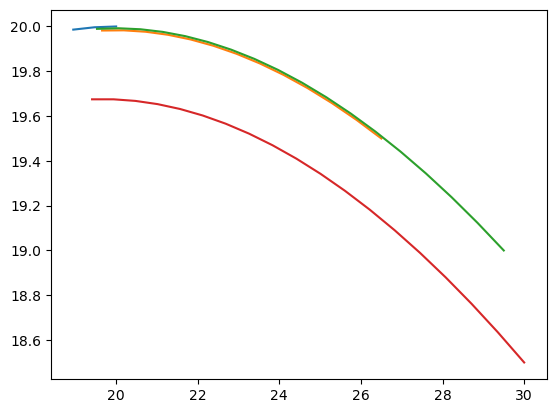

In [34]:
fig = plt.figure()
for traj in Traj_feas: 
    plt.plot(np.array(traj[0])[:,0], np.array(traj[0])[:,1],'-')
plt.show()

In [35]:
x = np.linspace(0,30, 31)
y = np.linspace(0,20,21)
X,Y = np.meshgrid(x,y)
Z = np.zeros(X.shape)
for i in range(len(X)):
    for j in range(len(X[0])):
        s = 0
        for traj in Traj_feas: 
            if (pos_traj([X[i,j], Y[i,j]], traj[0])): 
                s = 1
                break
        if s ==0: 
            for traj in Traj_unsafe: 
                if (pos_traj_up([X[i,j], Y[i,j]], traj[0])): 
                    s = 2
                    break
        Z[i,j] = s

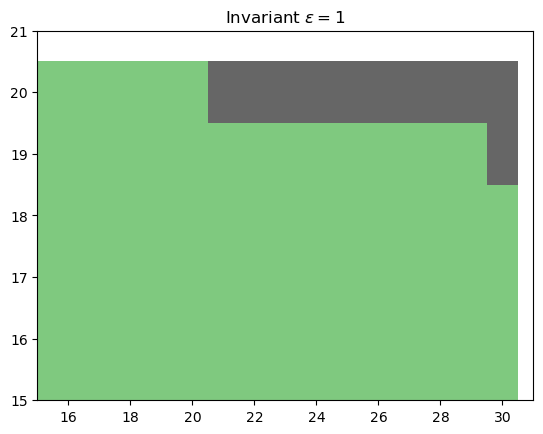

In [36]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Accent')
ax.set_title(r'Invariant $\epsilon = 1$')
# set the limits of the plot to the limits of the data
ax.axis([15, x.max()+1, 15, y.max()+1])
plt.show()
plt.show()

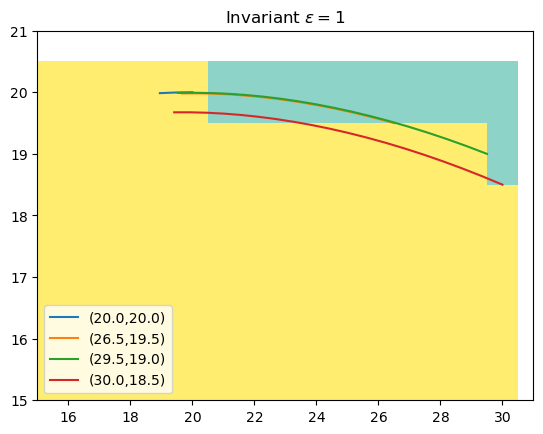

In [37]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title(r'Invariant $\epsilon = 1$')
# set the limits of the plot to the limits of the data
ax.axis([15, x.max()+1, 15, y.max()+1])
for traj in Traj_feas: 
    ax.plot(np.array(traj[0])[:,0], np.array(traj[0])[:,1],'-', label = f'({traj[0][0][0]},{traj[0][0][1]})')

plt.legend()
plt.show()

In [38]:
x = np.linspace(0,30, 1000)
y = np.linspace(0,30,1000)
X,Y = np.meshgrid(x,y)
Z = X.copy()
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i,j] = g([Y[i,j],X[i,j]])

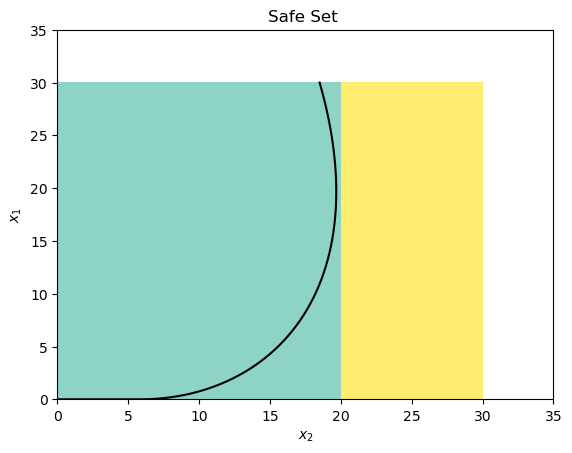

In [39]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title(r'Safe Set ')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max()+5, y.min(), y.max()+5])
T = 50
h = 5.0
N_step = 10
N_euler = 1000

u = lambda t: step_function(t,h,[np.array([u_min, u_min])])
w = lambda t: step_function(t,h,[w_max])
Solu1,Timestep= RK4(t_0 = 0, t_f=5, f=f, u=u, d=w , x_0 = traj[0][0] , n =N_euler, proj = proj)
ax.plot(np.array(Solu1)[:,1], np.array(Solu1)[:,0],'-k', label = f'({traj[0][0][1]},{traj[0][0][0]})')
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")
plt.show()

In [40]:
x = np.linspace(0,20, 1001)
y = np.linspace(0,30,1001)
X,Y = np.meshgrid(x,y)
Z = X.copy()
for i in range(len(X)):
    for j in range(len(X[0])):
        s = 0
        for traj in Traj_feas: 
            if (pos_traj([Y[i,j], X[i,j]], traj[0])): 
                s = 1
                break
        if s ==0: 
            for traj in Traj_unsafe: 
                if (pos_traj_up([Y[i,j], X[i,j]], traj[0])): 
                    s = 2
                    break
        Z[i,j] = s

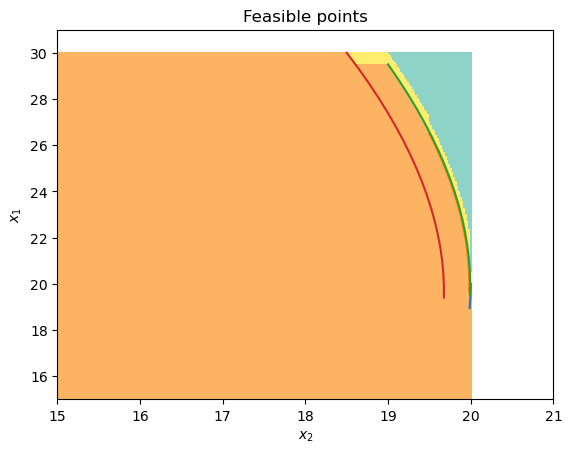

In [41]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title(r'Feasible points')
# set the limits of the plot to the limits of the data
ax.axis([15, x.max()+1, 15, y.max()+1])
for traj in Traj_feas: 
    ax.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')
    
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")
plt.show()

In [42]:
x = np.linspace(0,20, 1001)
y = np.linspace(0,30,1001)
X,Y = np.meshgrid(x,y)
Z = np.zeros(X.shape)
for i in range(len(X)):
    for j in range(len(X[0])):
        s = 0
        if (pos_traj_up([Y[i,j], X[i,j]], Traj_unsafe[-3][0])): 
            s = 1
        Z[i,j] = s

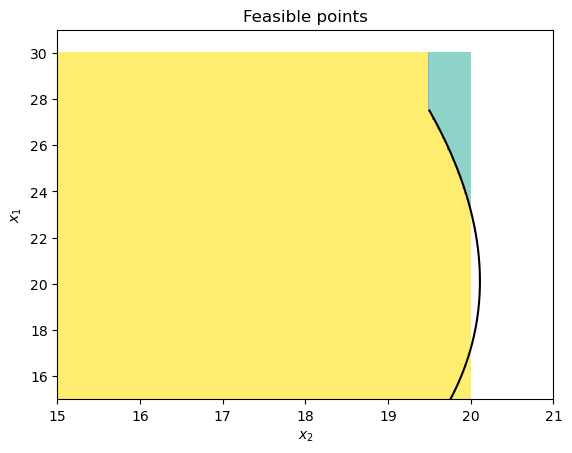

In [43]:
fig, ax = plt.subplots()
c = ax.contourf(X, Y, Z, cmap='Set3_r')
ax.set_title(r'Feasible points')
# set the limits of the plot to the limits of the data
ax.axis([15, x.max()+1, 15, y.max()+1])
T = 50
h = 5.0
N_step = 10
N_euler = 1000

u = lambda t: step_function(t,h,[np.array([u_min, u_min])])
w = lambda t: step_function(t,h,[w_max])
Solu1,Timestep= RK4(t_0 = 0, t_f=5, f=f, u=u, d=w , x_0 = Traj_unsafe[-3][0][0] , n =N_euler, proj = proj)
ax.plot(np.array(Solu1)[:,1], np.array(Solu1)[:,0],'-k', label = f'({Traj_unsafe[-3][0][0][1]},{Traj_unsafe[-3][0][0][0]})')
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")

plt.show()

In [44]:
x = np.linspace(0,20, 1001)
y = np.linspace(0,30,1001)
X,Y = np.meshgrid(x,y)
Z = np.zeros(X.shape)
for i in range(len(X)):
    for j in range(len(X[0])):
        s =0
        if (pos_traj([Y[i,j], X[i,j]], Traj_feas[2][0])):
            s=1
            Z[i,j] = s
            continue
        if (pos_traj_up([Y[i,j], X[i,j]], Traj_unsafe[-3][0])): 
            s = 2
            Z[i,j] = s
            continue

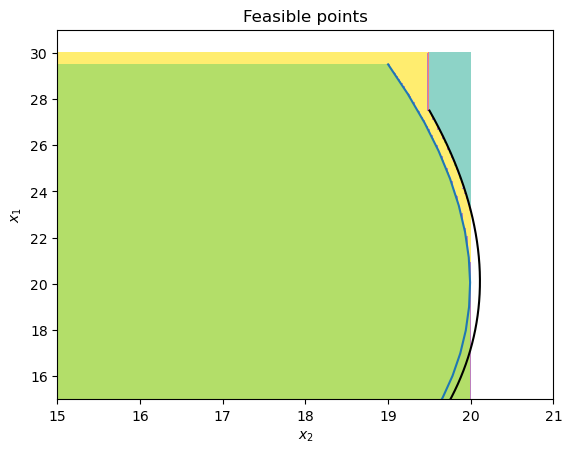

In [45]:
fig, ax = plt.subplots()
c = ax.contourf(X, Y, Z, cmap='Set3_r')
ax.set_title(r'Feasible points')
# set the limits of the plot to the limits of the data
ax.axis([15, x.max()+1, 15, y.max()+1])



ax.plot(np.array(Solu1)[:,1], np.array(Solu1)[:,0],'-k', label = f'({Traj_unsafe[-3][0][0][1]},{Traj_unsafe[-3][0][0][0]})')
ax.plot(np.array(Traj[2])[:20,1], np.array(Traj[2])[:20,0],'-',label = f'({Traj[2][0][1]},{Traj[2][0][0]})')
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")

plt.show()

In [46]:
Traj = computing_invariant(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 1 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

In [47]:
%%timeit -n 10
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 1 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

27.4 ms ± 858 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [60]:
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 1 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

In [61]:
[traj[0][0] for traj in Traj_feas]

[array([20., 20.]), array([29., 19.]), array([30., 18.])]

In [62]:
x = np.linspace(0,20, 1001)
y = np.linspace(0,30,1001)
X,Y = np.meshgrid(x,y)
Z = X.copy()
for i in range(len(X)):
    for j in range(len(X[0])):
        s = 0
        for traj in Traj_feas: 
            if (pos_traj([Y[i,j], X[i,j]], traj[0])): 
                s = 1
                break
        if s ==0: 
            for traj in Traj_unsafe: 
                if (pos_traj_up([Y[i,j], X[i,j]], traj[0])): 
                    s = 2
                    break
        Z[i,j] = s

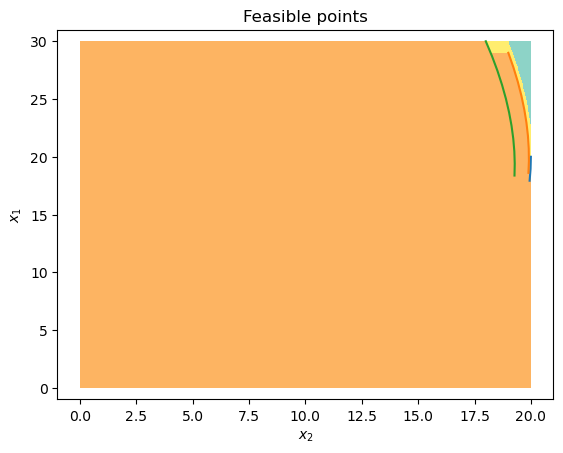

In [63]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title(r'Feasible points')
# set the limits of the plot to the limits of the data
ax.axis([x.min()-1, x.max()+1, x.min()-1, y.max()+1])
for traj in Traj_feas: 
    ax.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')
    
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")
plt.show()

In [64]:
?ax.inset_axes

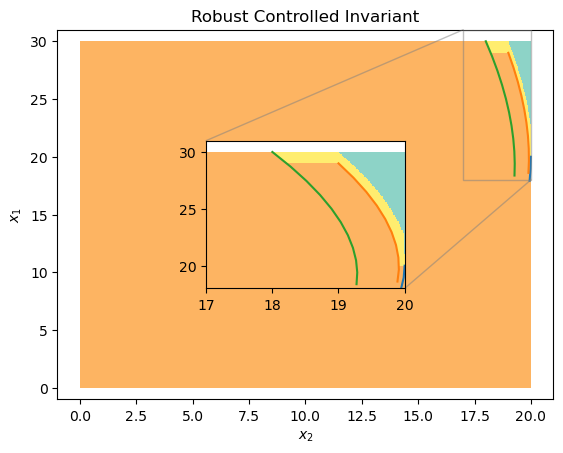

In [65]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title('Robust Controlled Invariant')
# set the limits of the plot to the limits of the data
ax.axis([x.min()-1, x.max()+1, x.min()-1, y.max()+1])
for traj in Traj_feas: 
    ax.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')

axins = ax.inset_axes([0.3, 0.3, 0.4, 0.4])
x1, x2, y1, y2 = 17, 20, 18, 31
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
c = axins.pcolormesh(X, Y, Z, cmap='Set3_r')

for traj in Traj_feas: 
    axins.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')
ax.indicate_inset_zoom(axins)
 
    
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")
plt.show()

In [66]:
%%timeit
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 0.05 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

1min 28s ± 2.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 0.05 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)
print(1)
x = np.linspace(0,20, 1001)
y = np.linspace(0,30,1001)
X,Y = np.meshgrid(x,y)
Z = X.copy()
for i in range(len(X)):
    for j in range(len(X[0])):
        s = 0
        for traj in Traj_feas: 
            if (pos_traj([Y[i,j], X[i,j]], traj[0])): 
                s = 1
                break
        if s ==0: 
            for traj in Traj_unsafe: 
                if (pos_traj_up([Y[i,j], X[i,j]], traj[0])): 
                    s = 2
                    break
        Z[i,j] = s

1


In [68]:
[traj[0][0] for traj in Traj_feas]

[array([20.5, 20. ]),
 array([22.  , 19.95]),
 array([22.9, 19.9]),
 array([23.55, 19.85]),
 array([24.1, 19.8]),
 array([24.6 , 19.75]),
 array([25.1, 19.7]),
 array([25.5 , 19.65]),
 array([25.9, 19.6]),
 array([26.3 , 19.55]),
 array([26.6, 19.5]),
 array([26.95, 19.45]),
 array([27.3, 19.4]),
 array([27.6 , 19.35]),
 array([27.9, 19.3]),
 array([28.2 , 19.25]),
 array([28.45, 19.2 ]),
 array([28.75, 19.15]),
 array([29. , 19.1]),
 array([29.25, 19.05]),
 array([29.55, 19.  ]),
 array([29.8 , 18.95]),
 array([30. , 18.9])]

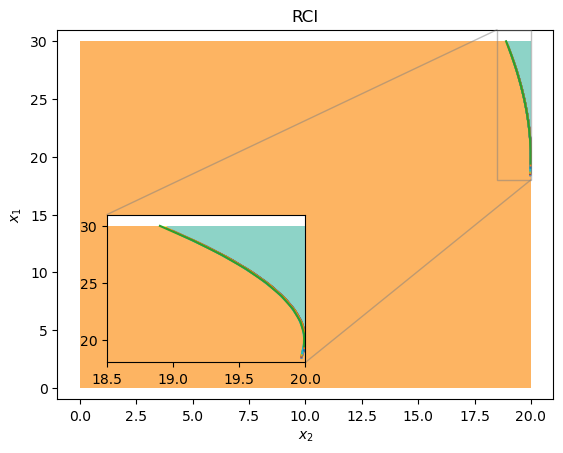

In [69]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title('RCI')
# set the limits of the plot to the limits of the data
ax.axis([x.min()-1, x.max()+1, x.min()-1, y.max()+1])
for traj in Traj_feas: 
    ax.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')

axins = ax.inset_axes([0.1, 0.1, 0.4, 0.4])
x1, x2, y1, y2 = 18.5, 20, 18, 31
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
c = axins.pcolormesh(X, Y, Z, cmap='Set3_r')

for traj in Traj_feas: 
    axins.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')
ax.indicate_inset_zoom(axins)
 
    
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")
plt.show()

In [55]:
%%timeit -n 10
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 0.5 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

119 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [56]:
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), np.array([22,22]), -20, 0, 0.5 , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)
x = np.linspace(0,20, 1001)
y = np.linspace(0,30,1001)
X,Y = np.meshgrid(x,y)
Z = X.copy()
for i in range(len(X)):
    for j in range(len(X[0])):
        s = 0
        for traj in Traj_feas: 
            if (pos_traj([Y[i,j], X[i,j]], traj[0])): 
                s = 1
                break
        if s ==0: 
            for traj in Traj_unsafe: 
                if (pos_traj_up([Y[i,j], X[i,j]], traj[0])): 
                    s = 2
                    break
        Z[i,j] = s

In [57]:
[traj[0][0] for traj in Traj_feas]

[array([20.5, 20. ]),
 array([26.5, 19.5]),
 array([29.5, 19. ]),
 array([30. , 18.5])]

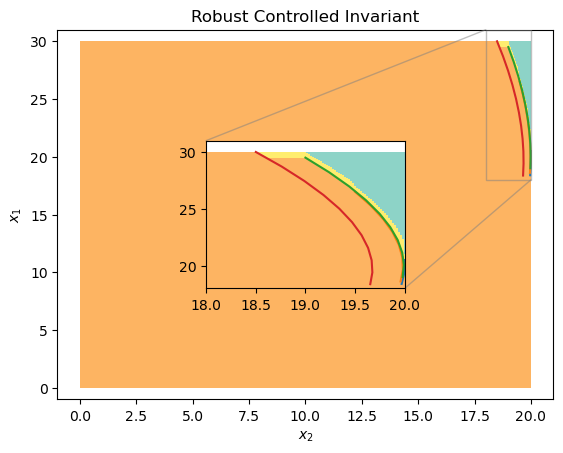

In [59]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title('Robust Controlled Invariant')
# set the limits of the plot to the limits of the data
ax.axis([x.min()-1, x.max()+1, x.min()-1, y.max()+1])
for traj in Traj_feas: 
    ax.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')

axins = ax.inset_axes([0.3, 0.3, 0.4, 0.4])
x1, x2, y1, y2 = 18, 20, 18, 31
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
c = axins.pcolormesh(X, Y, Z, cmap='Set3_r')

for traj in Traj_feas: 
    axins.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')
ax.indicate_inset_zoom(axins)
 
    
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")
plt.show()

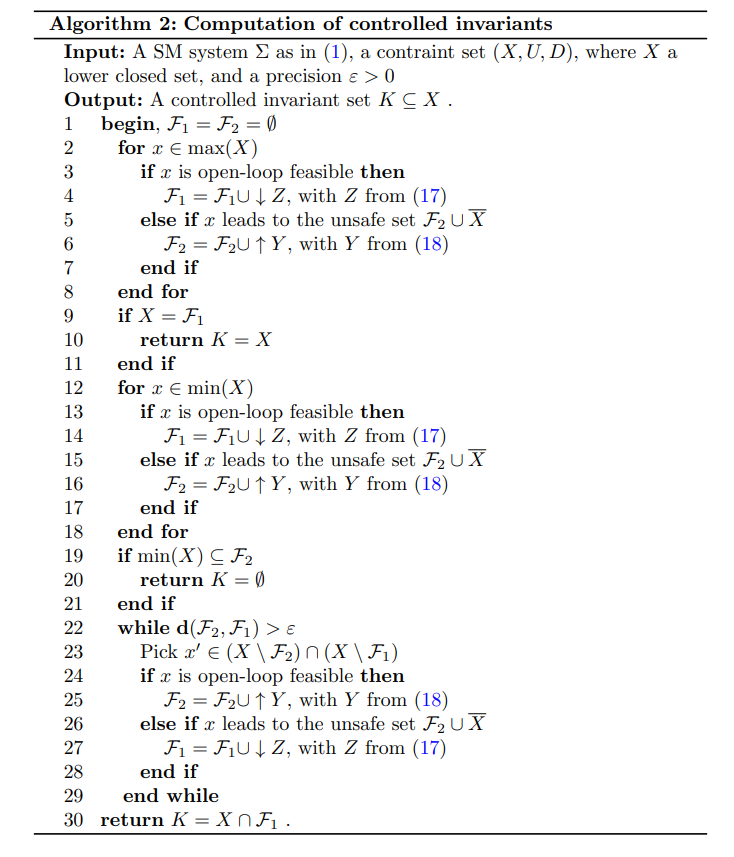